In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
import pymannkendall as mk

In [2]:

well_data = pd.read_excel('../data/Data-Wells.xlsx')

well_data.head(10)

Sample ID          Well Name   Entered 1,4-Dioxane Results (ppb)  \
0      76970  1021 Westview Way  05/10/19                        nd   
1      76971  1024 Westview Way  05/10/19                        nd   
2      76969  1049 Westview Way  05/10/19                        nd   
3       3525         105 Myrtle       NaN                        nd   
4       3714         105 Myrtle       NaN                        nd   
5       4013         105 Myrtle       NaN                        nd   
6       4337         105 Myrtle       NaN                        nd   
7       4671         105 Myrtle       NaN                        nd   
8       5428         105 Myrtle       NaN                        nd   
9      74144         105 Myrtle  06/19/14                        nd   

  Date Sampled Time Sampled Date Received Date Analyzed  Reporting Limit  \
0     05/08/19        14:05           NaN      05/15/19              1.0   
1     05/08/19        14:18           NaN      05/15/19              1.0   
2     05/08/19        14:43           NaN      05/14/19              1.0   
3     03/27/99          NaN           NaN           NaN              1.0   
4     05/28/99          NaN           NaN           NaN              1.0   
5     08/19/99          NaN           NaN           NaN              1.0   
6     11/16/99          NaN           NaN           NaN              1.0   
7     02/21/00          NaN           NaN           NaN              1.0   
8     08/21/00          NaN           NaN           NaN              1.0   
9     06/18/14        12:15           NaN      06/26/14              1.0   

  Reporting Lab  ...                   Well Comments Scr Elev Range  \
0           PLS  ...                             NaN            NaN   
1           PLS  ...                             NaN            NaN   
2           PLS  ...                             NaN            NaN   
3           MEG  ...  Replacement water supply well.        800-820   
4           MEG  ...  Replacement water supply well.        800-820   
5           MEG  ...  Replacement water supply well.        800-820   
6           MEG  ...  Replacement water supply well.        800-820   
7           MEG  ...  Replacement water supply well.        800-820   
8           MEG  ...  Replacement water supply well.        800-820   
9           PLS  ...  Replacement water supply well.        800-820   

   bar color                           BegFolder KML EndFolder KML  \
0      green  <Folder><name>1021 Westview Way</name>     </Folder>   
1      green  <Folder><name>1024 Westview Way</name>     </Folder>   
2      green  <Folder><name>1049 Westview Way</name>     </Folder>   
3      green         <Folder><name>105 Myrtle</name>           NaN   
4      green                                     NaN           NaN   
5      green                                     NaN           NaN   
6      green                                     NaN           NaN   
7      green                                     NaN           NaN   
8      green                                     NaN           NaN   
9      green                                     NaN           NaN   

                  BegFolder2KML EndFolder2KML  Max-to-date.1 MaxToDateFlag  \
0      <Folder><name>n/a</name>           NaN          0.001           NaN   
1                           NaN           NaN          0.001           NaN   
2                           NaN     </Folder>          0.001           NaN   
3  <Folder><name>800-820</name>           NaN          0.001           NaN   
4                           NaN           NaN          0.001           NaN   
5                           NaN           NaN          0.001           NaN   
6                           NaN           NaN          0.001           NaN   
7                           NaN           NaN          0.001           NaN   
8                           NaN           NaN          0.001           NaN   
9                           NaN           NaN      

In [3]:
well_data.head(10)

rm_nd = well_data.loc[well_data['1,4-Dioxane Results (ppb)'] != 'nd'].copy()

rm_capital_nd = rm_nd.loc[rm_nd['1,4-Dioxane Results (ppb)'] != 'ND'].copy()

rm_capital_nd['1,4-Dioxane Results (ppb)'] = rm_capital_nd['1,4-Dioxane Results (ppb)'].map(lambda x: x.replace(',', ''))

rm_capital_nd['1,4-Dioxane Results (ppb)'] = rm_capital_nd['1,4-Dioxane Results (ppb)'].map(lambda x: x.replace('<', ''))

res = rm_capital_nd
res.loc[:, 'ds']= pd.to_datetime(res['Date Sampled'])
res.loc[:, 'dioxane_results']= pd.to_numeric(res['1,4-Dioxane Results (ppb)'])
res.head(5)

Sample ID           Well Name Entered 1,4-Dioxane Results (ppb)  \
16         57  110 Parkland Plaza     NaN                        17   
17         58  110 Parkland Plaza     NaN                        17   
18         61  110 Parkland Plaza     NaN                        12   
19         62  110 Parkland Plaza     NaN                         1   
20        187  110 Parkland Plaza     NaN                         7   

   Date Sampled Time Sampled Date Received Date Analyzed  Reporting Limit  \
16     08/22/86          NaN           NaN           NaN              1.0   
17     09/19/86          NaN           NaN           NaN              1.0   
18     10/10/86          NaN           NaN           NaN              1.0   
19     10/10/86          NaN           NaN           NaN              1.0   
20     11/09/87          NaN           NaN           NaN              1.0   

   Reporting Lab  ...  bar color                            BegFolder KML  \
16           NaN  ...     orange  <Folder><name>110 Parkland Plaza</name>   
17           NaN  ...     orange                                      NaN   
18           NaN  ...     orange                                      NaN   
19           NaN  ...     yellow                                      NaN   
20           NaN  ...     orange                                      NaN   

    EndFolder KML                 BegFolder2KML EndFolder2KML Max-to-date.1  \
16            NaN  <Folder><name>840-860</name>           NaN          17.0   
17            NaN                           NaN           NaN          17.0   
18            NaN                           NaN           NaN          17.0   
19            NaN                           NaN           NaN          17.0   
20            NaN                           NaN           NaN          17.0   

   MaxToDateFlag         Last Date Rd         ds  dioxane_results  
16     MaxToDate  2019-09-12 00:00:00 1986-08-22             17.0  
17     MaxToDate  2019-09-12 00:00:00 1986-09-19             17.0  
18           NaN  2019-09-12 00:00:00 1986-10-10             12.0  
19           NaN  2019-09-12 00:00:00 1986-10-10              1.0  
20           NaN  2019-09-12 00:00:00 1987-11-09              7.0  

[5 rows x 77 columns]

In [4]:
di_time = res.iloc[:, lambda df: df.columns.str.contains('Well Name|ds|dioxane_results',
                                              case=False)].copy()
di_time.rename(columns = {'dioxane_results':'y'}, inplace = True)
di_time.head(20)

Well Name         ds     y
16  110 Parkland Plaza 1986-08-22  17.0
17  110 Parkland Plaza 1986-09-19  17.0
18  110 Parkland Plaza 1986-10-10  12.0
19  110 Parkland Plaza 1986-10-10   1.0
20  110 Parkland Plaza 1987-11-09   7.0
21  110 Parkland Plaza 1987-11-09  18.0
22  110 Parkland Plaza 1988-04-18  13.0
23  110 Parkland Plaza 1988-12-09  14.0
24  110 Parkland Plaza 1989-07-19  11.0
25  110 Parkland Plaza 1990-01-30  12.0
26  110 Parkland Plaza 1990-08-01   8.0
27  110 Parkland Plaza 1991-01-23  10.0
28  110 Parkland Plaza 1991-08-22  10.0
29  110 Parkland Plaza 1992-07-23   8.0
30  110 Parkland Plaza 1993-03-03   9.0
31  110 Parkland Plaza 1993-08-23   9.0
32  110 Parkland Plaza 1998-12-21   3.0
33  110 Parkland Plaza 1999-08-19   2.0
34  110 Parkland Plaza 1999-11-12   5.0
35  110 Parkland Plaza 2000-02-15   8.0

354


<Figure size 360x720 with 0 Axes>

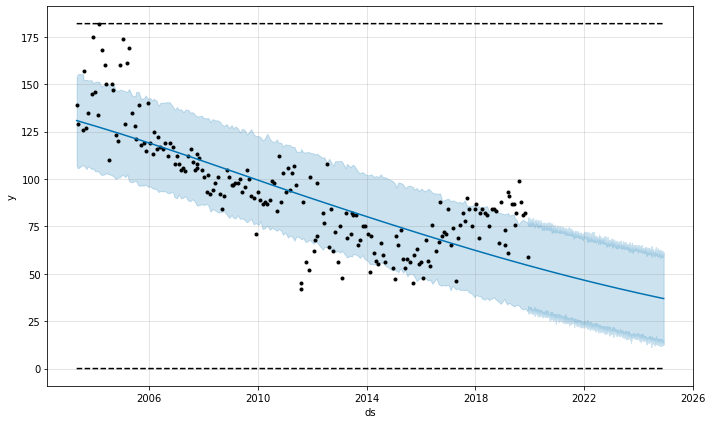

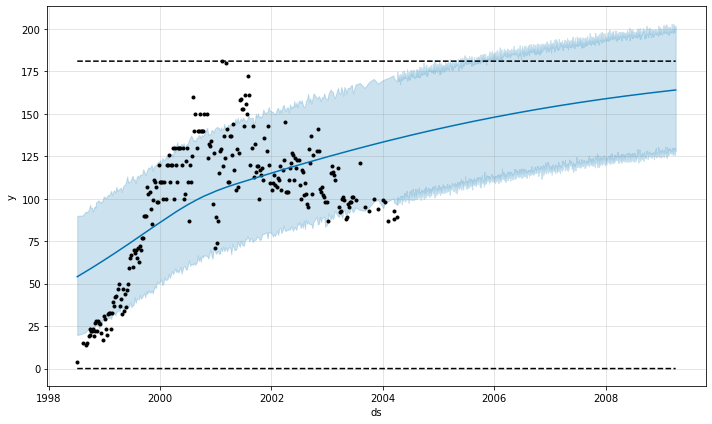

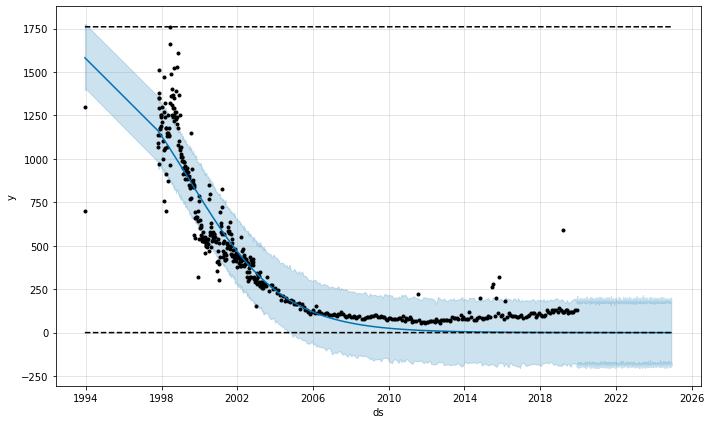

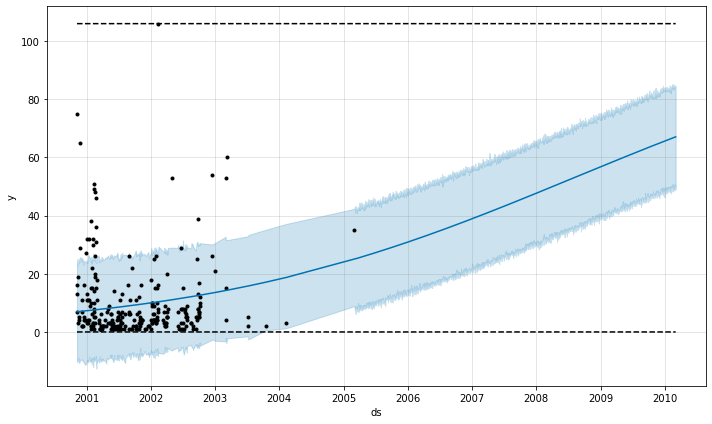

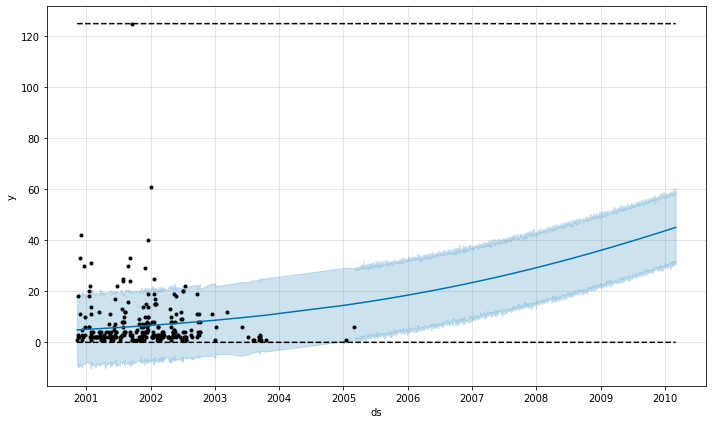

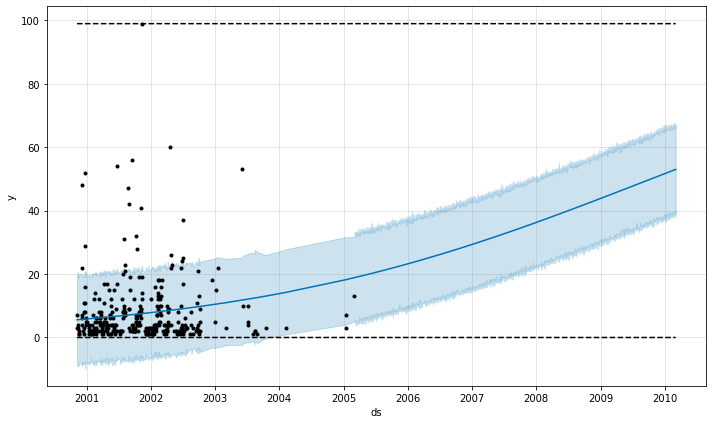

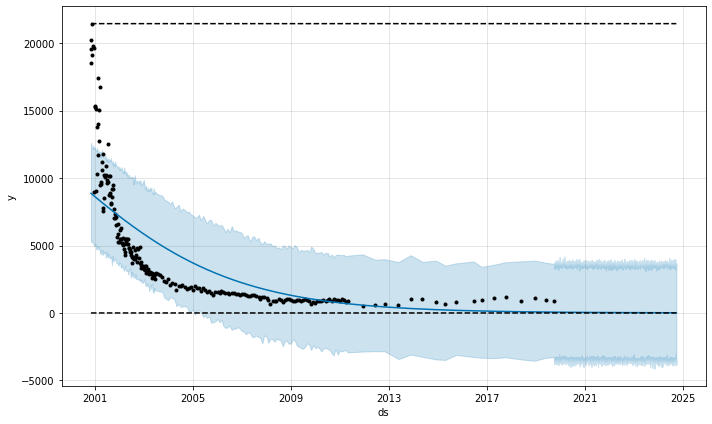

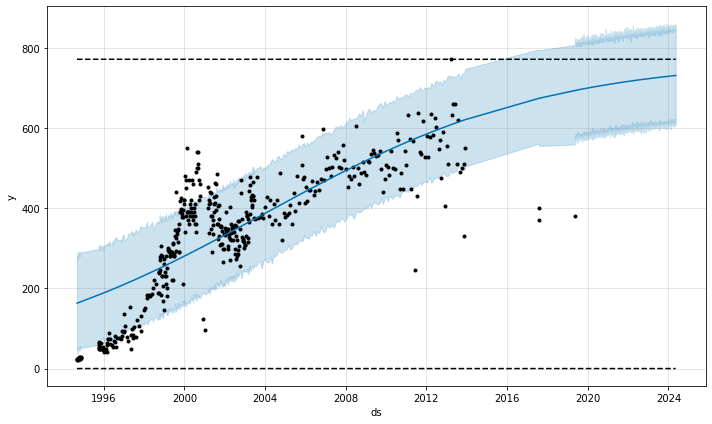

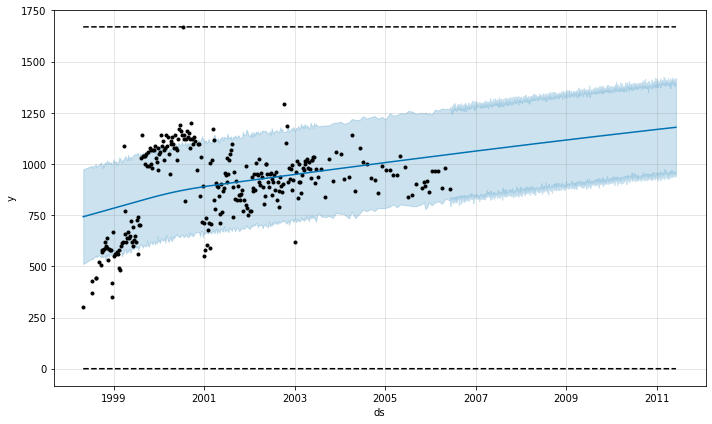

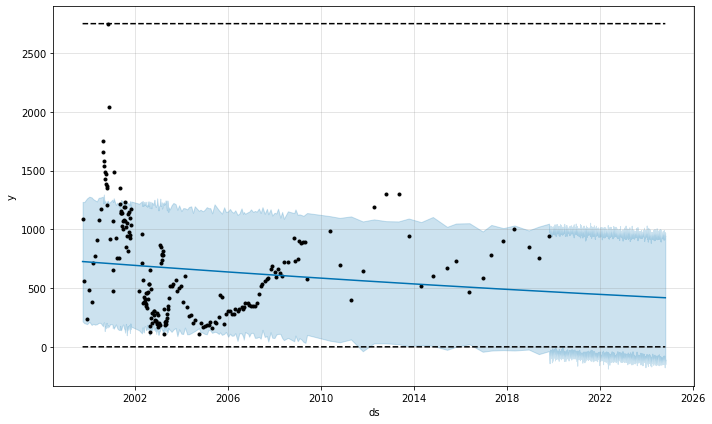

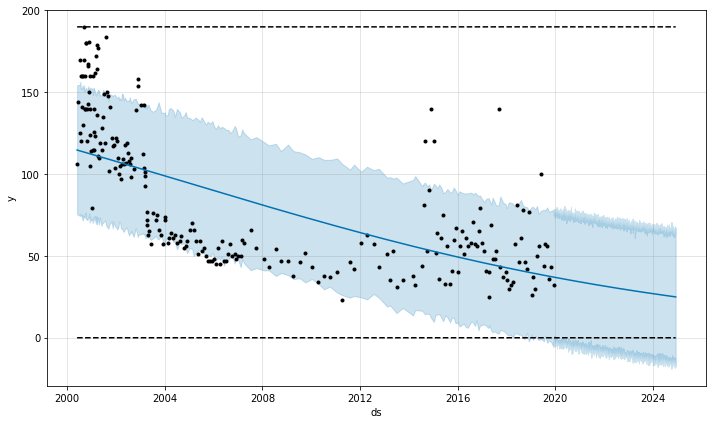

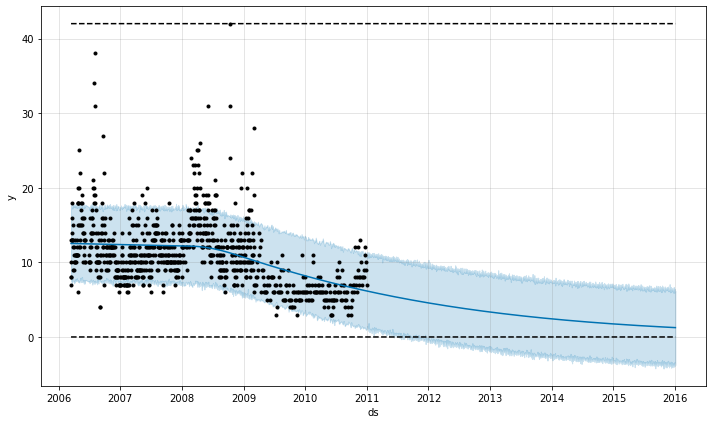

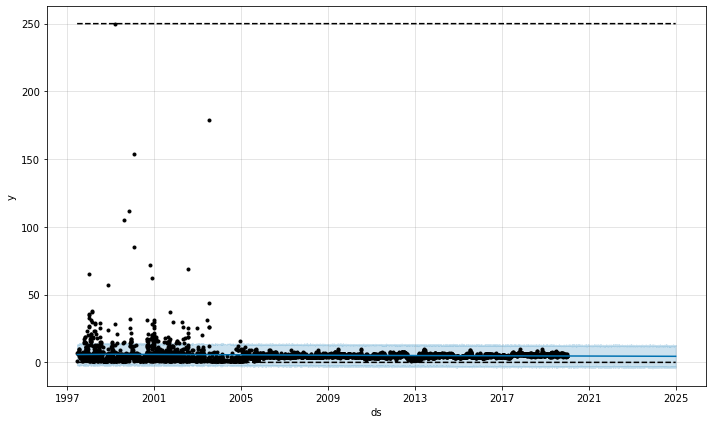

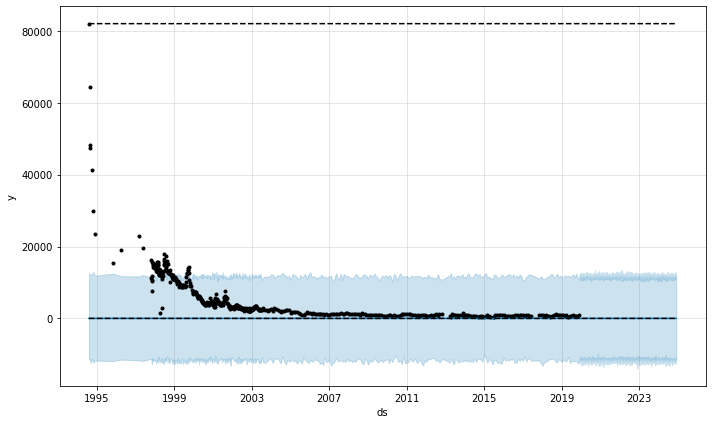

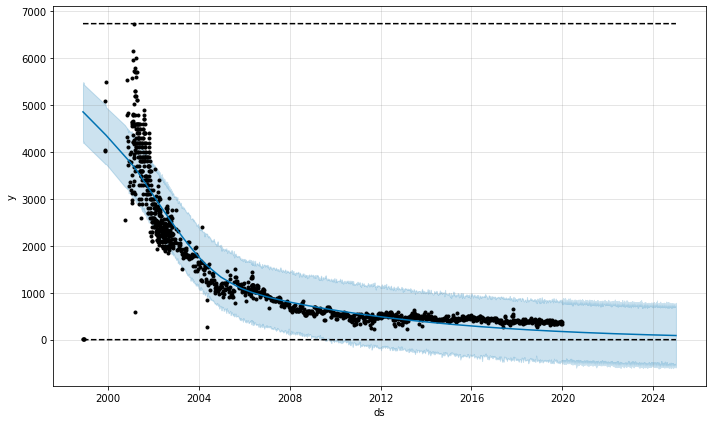

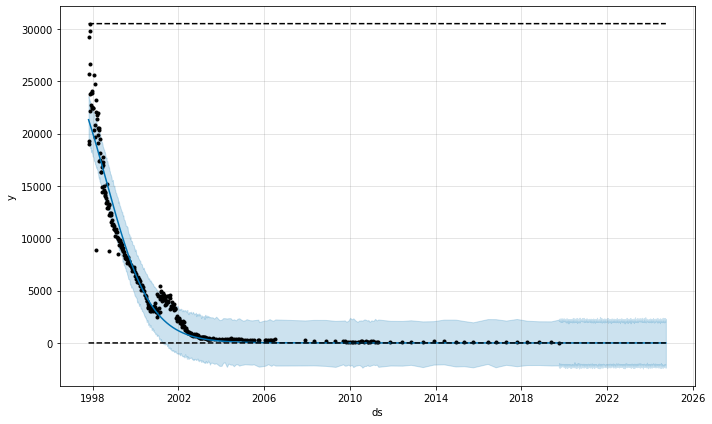

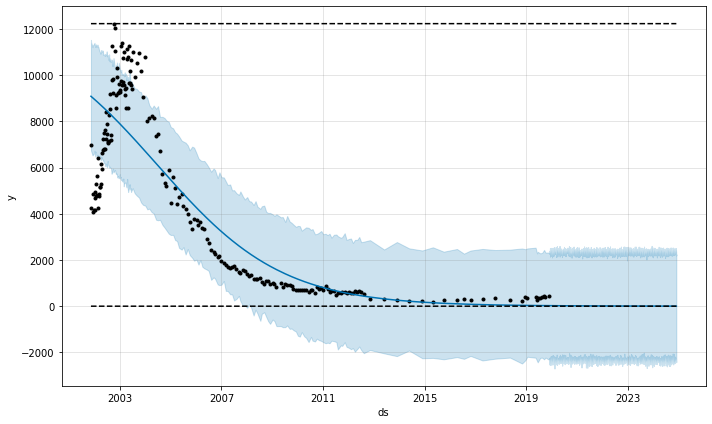

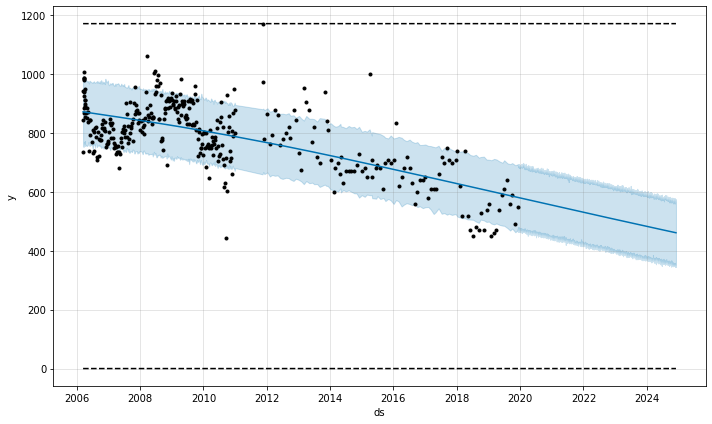

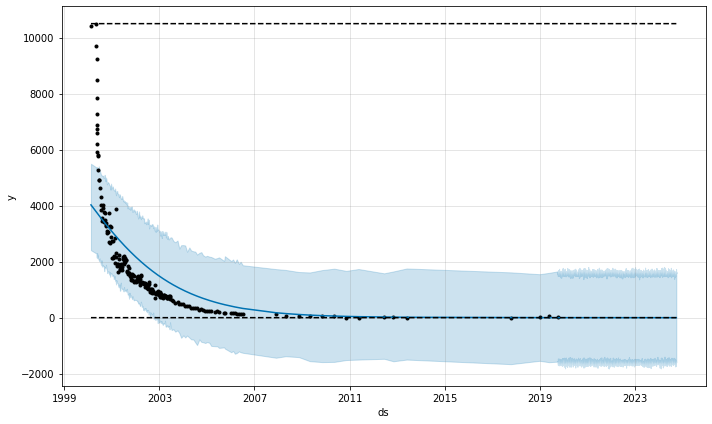

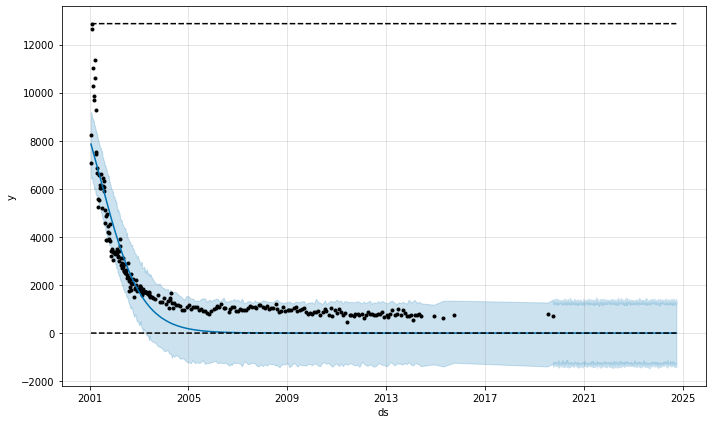

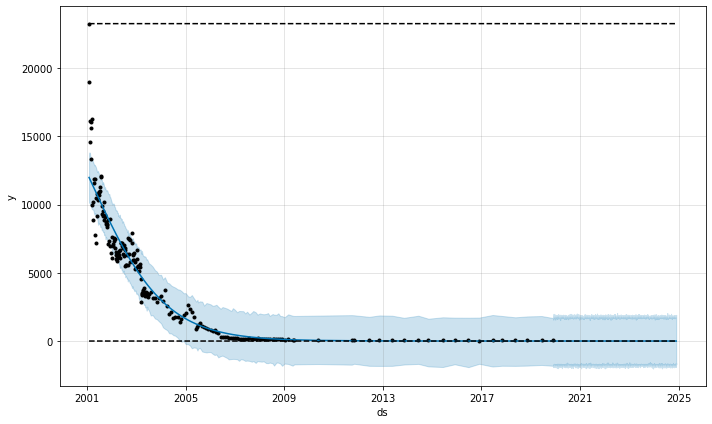

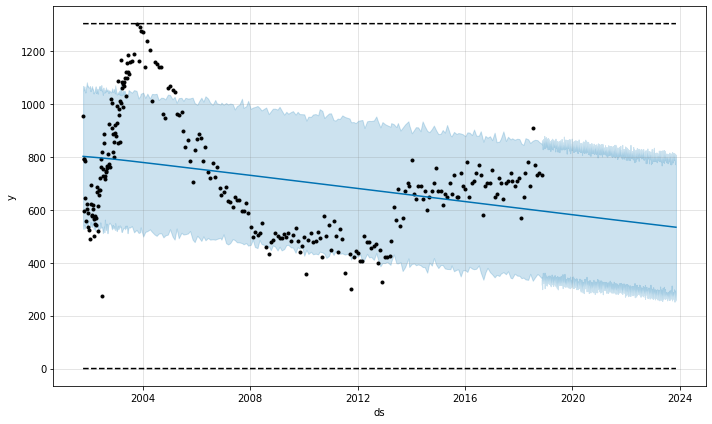

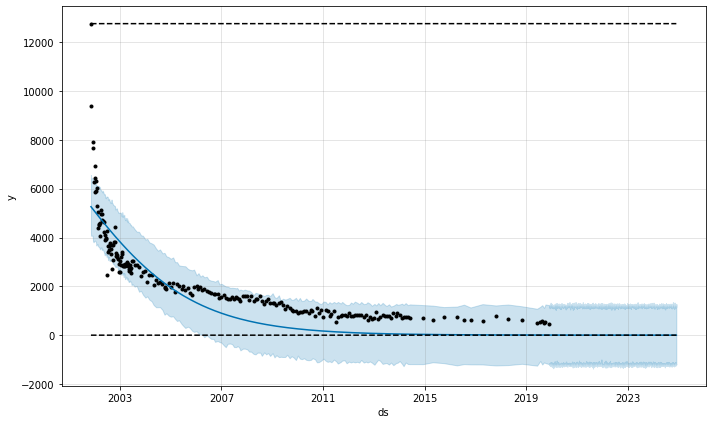

Well name       trend      h             p          z       Tau  \
0   A2 Cleaning Supply  decreasing   True  0.000000e+00 -12.370040 -0.585193   
1                 AE-1  increasing   True  2.665823e-11   6.663940  0.279534   
2                DOLPH  decreasing   True  0.000000e+00 -25.771401 -0.775727   
3            EFF-UV1-A    no trend  False  8.642797e-01   0.170929  0.006991   
4            EFF-UV2-A    no trend  False  5.380142e-01  -0.615819 -0.024685   
5            EFF-UV2-B    no trend  False  9.238045e-01   0.095642  0.003552   
6                 HZ-S  decreasing   True  0.000000e+00 -21.043372 -0.902710   
7                 LB-1  increasing   True  0.000000e+00  20.960241  0.668038   
8                 LB-2  increasing   True  2.528626e-06   4.705808  0.186000   
9                MW-50  decreasing   True  7.027632e-05  -3.975348 -0.186266   
10              MW-53i  decreasing   True  0.000000e+00 -13.685222 -0.598233   
11           Maple-Inj  decreasing   True  0.000000e+00 -11.653979 -0.255606   
12             OUTFALL  increasing   True  0.000000e+00  18.267181  0.162250   
13                PW-1  decreasing   True  0.000000e+00 -28.713232 -0.853069   
14            Red Pond  decreasing   True  0.000000e+00 -47.160234 -0.843711   
15                TW-1  decreasing   True  0.000000e+00 -26.912729 -0.934629   
16               TW-10  decreasing   True  0.000000e+00 -14.260238 -0.658365   
17               TW-19  decreasing   True  0.000000e+00 -10.372221 -0.364181   
18                TW-3  decreasing   True  0.000000e+00 -20.447224 -0.939494   
19                TW-5  decreasing   True  0.000000e+00 -20.956280 -0.867239   
20                TW-6  decreasing   True  0.000000e+00 -19.281266 -0.892304   
21                TW-8  decreasing   True  6.602750e-05  -3.990164 -0.163264   
22                TW-9  decreasing   True  0.000000e+00 -20.357693 -0.905750   

            s         var_s      slope     intercept  
0    -11880.0  9.221840e+05  -0.392857    127.482143  
1      9124.0  1.874188e+06   0.277016     71.680491  
2    -94461.0  1.343445e+07  -2.352941    973.000000  
3       252.0  2.156337e+06   0.000000      5.000000  
4      -930.0  2.275757e+06   0.000000      3.000000  
5       187.0  3.782025e+06   0.000000      4.000000  
6    -26982.0  1.643938e+06 -38.714286   7701.142857  
7     64813.0  9.561330e+06   1.101562    126.656250  
8      7687.0  2.667672e+06   1.000000    785.500000  
9     -3933.0  9.783103e+05  -2.120567    781.358156  
10   -16589.0  1.469212e+06  -0.487456    121.776136  
11  -108290.0  8.634163e+07  -0.005376     13.473118  
12  2461625.0  1.815935e+10   0.000168      4.537143  
13  -109424.0  1.452289e+07 -25.540000   9551.620000  
14  -816827.0  2.999903e+08  -2.657348   2766.685394  
15   -64495.0  5.742793e+06 -45.379059  11944.815373  
16   -14725.0  1.066100e+06 -41.877058   8306.529622  
17   -24060.0  5.380364e+06  -0.601001    913.081754  
18   -21412.0  1.096491e+06 -15.652174   2918.956522  
19   -29879.0  2.032706e+06 -14.914286   3261.771429  
20   -19769.0  1.051125e+06 -60.935484  10981.225806  
21    -5885.0  2.174522e+06  -0.678571    780.928571  
22   -23439.0  1.325513e+06 -18.402000   3836.127017

In [8]:

from fbprophet.plot import plot_plotly, plot_components_plotly
import plotly.offline as py

IS_DEBUG = False
IPY_PLOT = False

py.init_notebook_mode()

grouped = di_time.groupby('Well Name')
count = 1
n_rows = 2
n_cols = 1
fig = plt.figure(figsize=(5*n_cols, 5*n_rows))

mk_res = []

print(len(grouped))

for name, group in grouped:
    # if count > n_rows:
    #     break
    if len(group) < 200:
        continue

    max_value = group['y'].max()
    if IS_DEBUG:
        print(max_value)
        print(name)
        print(group)
    test = group

    test['cap'] = max_value
    test['floor'] = 0
    model = Prophet(growth = 'logistic', daily_seasonality = False, weekly_seasonality = False,
                    yearly_seasonality =  False)
    # fit the model
    model.fit(test)

    future = model.make_future_dataframe(periods=1826)
    future['cap'] = max_value
    future['floor'] = 0

    # use the model to make a forecast
    forecast = model.predict(future)
    # summarize the forecast
    if IS_DEBUG:
        print("forecast:")
        print(forecast[['ds', 'yhat']].head())
    # plot forecast
    if not IPY_PLOT:
        model.plot(forecast)
        plt.show()
    else:
        fig = plot_plotly(model, forecast)  # This returns a plotly Figure
        py.iplot(fig)

    # Data generation for analysis
    data = test.y
    trend, h, p, z, Tau, s, var_s, slope, intercept = mk.original_test(data)

    mk_res.append([name, trend, h, p, z, Tau, s, var_s, slope, intercept])

    count+=1


mk_df = pd.DataFrame(mk_res, columns=['Well name', 'trend', 'h', 'p', 'z', 'Tau', 's', 'var_s','slope' , 'intercept'])
mk_df

